In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digital-recognition/sample_submission.csv
/kaggle/input/digital-recognition/train.csv
/kaggle/input/digital-recognition/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [3]:
train= pd.read_csv("/kaggle/input/digital-recognition/train.csv")
test = pd.read_csv("/kaggle/input/digital-recognition/test.csv")
sample = pd.read_csv("/kaggle/input/digital-recognition/sample_submission.csv")

# **Grayscale Normalization**

In [4]:
y_train = train["label"]

# Drop 'label' column
x_train = train.drop(labels = ["label"],axis = 1) 
x_train = x_train / 255.0
x_train = x_train.values.reshape(-1, 28, 28, 1)

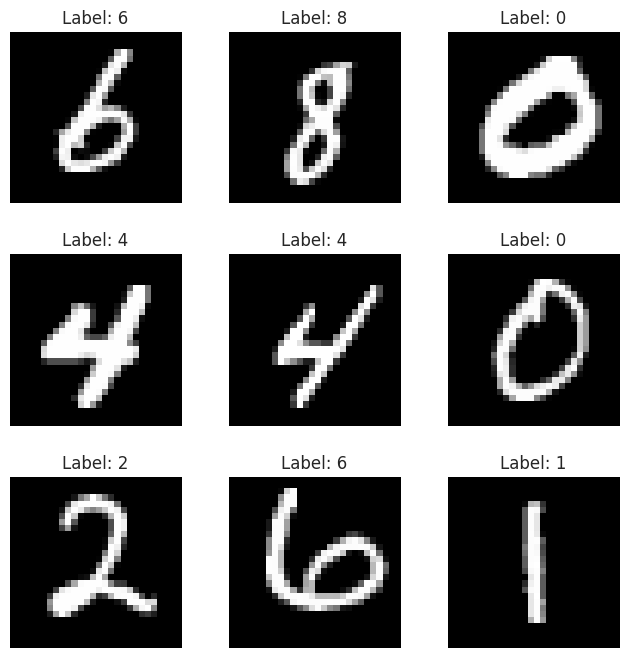

In [5]:
import random

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
plt.subplots_adjust(hspace=0.3)
for i in range(3):
    for j in range(3):
        idx = random.randint(0, train.shape[0])
        image = np.reshape(train.loc[idx][1:], (28, 28, 1))
        label = train.loc[idx][0]
        axs[i, j].imshow(image, cmap='gray')
        axs[i, j].set_title(f'Label: {label}')
        axs[i, j].set_axis_off()
plt.show()

In [6]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

# Training Mode

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1050/1050 [==============================] - 5s 4ms/step - loss: 0.3259 - accuracy: 0.9059 - val_loss: 0.1737 - val_accuracy: 0.9507
Epoch 2/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1473 - accuracy: 0.9568 - val_loss: 0.1352 - val_accuracy: 0.9557
Epoch 3/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1027 - accuracy: 0.9698 - val_loss: 0.1075 - val_accuracy: 0.9671
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0768 - accuracy: 0.9770 - val_loss: 0.0959 - val_accuracy: 0.9701
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0576 - accuracy: 0.9833 - val_loss: 0.0965 - val_accuracy: 0.9694
Epoch 6/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 0.0944 - val_accuracy: 0.9701
Epoch 7/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0340 - accuracy: 0.9905 - val_loss: 0.0929 - val_accuracy:

# Loss

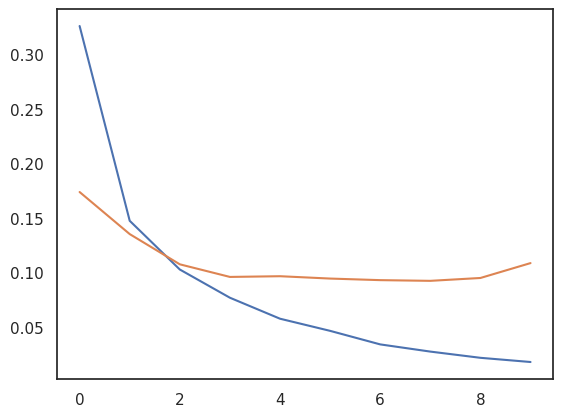

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])



# Accuracy

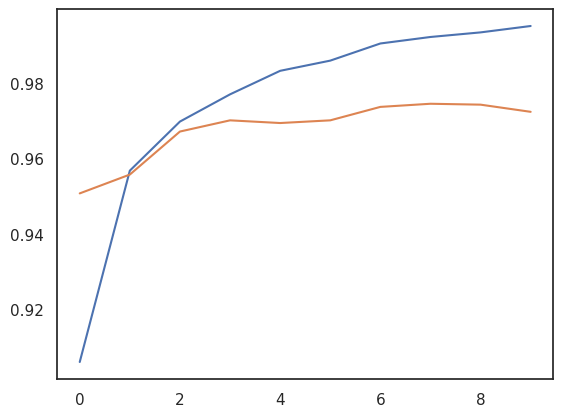

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
